# Single Qubit Gates

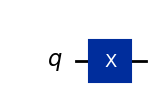

In [4]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

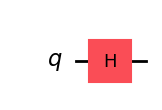

In [2]:
qc=QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

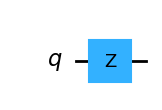

In [3]:
qc=QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

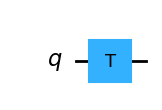

In [4]:
qc=QuantumCircuit(1)
qc.t(0)
qc.draw('mpl')

# Multi-Qubit Gates

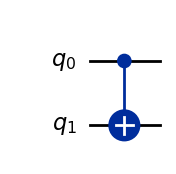

In [5]:
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')

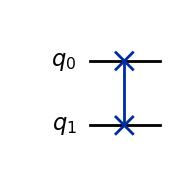

In [6]:
qc=QuantumCircuit(2)
qc.swap(1,0)
qc.draw('mpl')

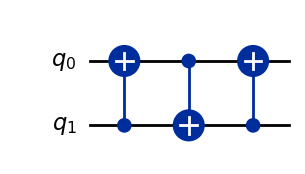

In [7]:
qc.decompose().draw('mpl')

# Three Qubit Gate

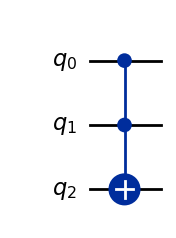

In [8]:
#Toffoli Gate(CCNOT)
qc=QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')


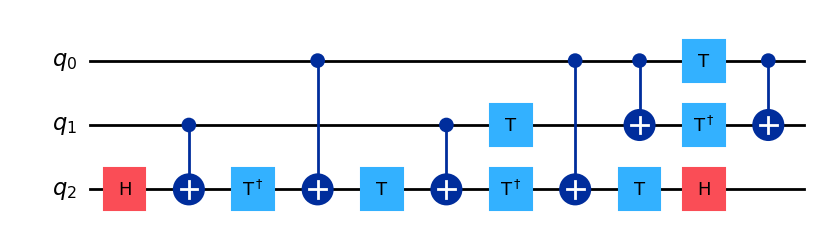

In [9]:
qc.decompose().draw('mpl')

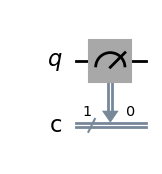

In [10]:
qc=QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw('mpl')

# Half-adder

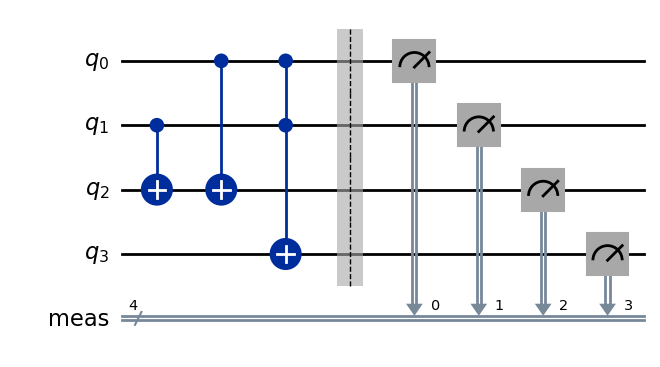

In [11]:
qc=QuantumCircuit(4)

a=0
b=0

if a:
 qc.x(0)
if b:
 qc.x(1)

qc.cx(1,2)
qc.cx(0,2)
qc.ccx(0,1,3)

qc.measure_all()

qc.draw('mpl')

# Superposition

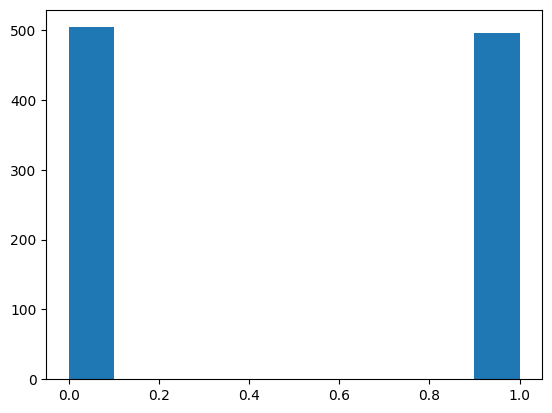

In [14]:
#classical coin toss
import numpy as np
import matplotlib.pyplot as plt
import random

nflips=1000
fliplist=[random.randint(0,1) for f in range(nflips)]

plt.hist(fliplist)
plt.show()

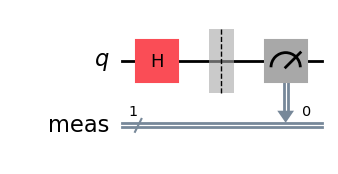

In [15]:
#Quantum Coin
qcoin=QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()
qcoin.draw('mpl')

In [1]:
#Lets run on a real QComputer.
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService
 

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')
 
# Load saved credentials
service = QiskitRuntimeService()

In [2]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)
 
# Use the least busy backend
backend = service.least_busy()
print(backend.name)

ibm_fez


In [19]:
## Use a local simulator if you don't have any more time available on your account, you can also choose to run this on a simulator instead. Just uncomment the code and run the cell below to do so
 
# from qiskit_aer import AerSimulator
 
## Generate a simulator that mimics the real quantum system
 
# backend_sim = AerSimulator.from_backend(backend)
 
## Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
 
# from qiskit.primitives import BackendSamplerV2
# sampler_sim = BackendSamplerV2(backend = backend_sim)
# from qiskit.primitives import BackendEstimatorV2
# estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [20]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qcoin)

In [21]:
## Execute
 
# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()
 
counts = res[0].data.meas.get_counts()
 
# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

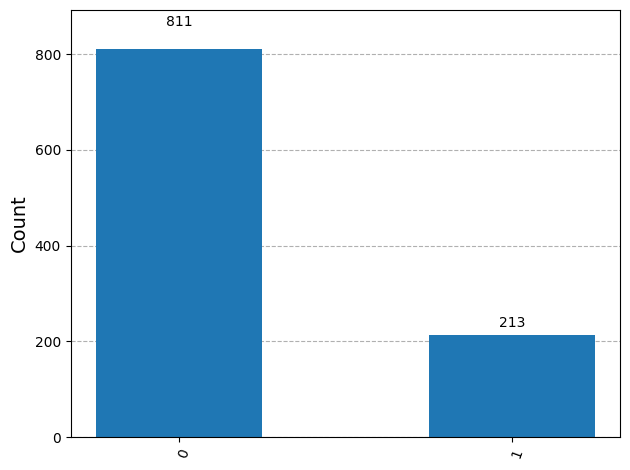

In [15]:
## Analysis
from qiskit.visualization import plot_histogram
 
plot_histogram(counts)

In [8]:
#Estimator
from qiskit.quantum_info import Pauli

qcoin=QuantumCircuit(1)
qcoin.h(0)
#For estimator we do not apply measurement to the circuit.


In [9]:
#Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm=generate_preset_pass_manager(target=target,optimization_level=3)
obs=Pauli('Z')
qc_isa=pm.run(qcoin)
obs_isa=obs.apply_layout(layout=qc_isa.layout)

In [25]:
## Execute on real hardware
estimator=Estimator(mode=backend)
pubs=[(qc_isa,obs_isa)]
job=estimator.run([[qc_isa,obs_isa]])
res=job.result()

# On a simulator:
# job = estimator_sim.run([[qc_isa, obs_isa]])
# res=job.result()
 
print(res[0].data.evs)

0.0045555204049351474


# Experiment in 3D

In [27]:
# Step 1: map problem
 
qcoin_lr = QuantumCircuit(1)
qcoin_lr.h(0)
 
obs = Pauli("X")
 
 
# Step 2: Transpile the circuit
 
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_lr)
obs_isa = obs.apply_layout(layout=qc_isa.layout)
 
# Step 3: Run the circuit on a real quantum computer
 
estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()
 
# Run the job on the Aer simulator with noise model from real backend
# job = estimator_sim.run([[qc_isa,obs_isa]])
# res=job.result()
 
# Step 4: Return the result in classical form, and analyze.
 
print(res[0].data.evs)

KeyboardInterrupt: 

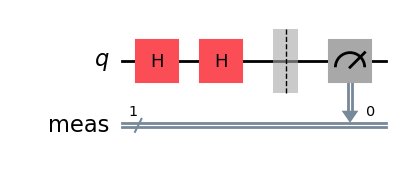

In [11]:
qcoin_0=QuantumCircuit(1)
qcoin_0.h(0)
qcoin_0.h(0)
qcoin_0.measure_all()

qcoin_0.draw('mpl')

In [12]:
## Transpile
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qcoin_0)
 
## Execute
 
# On real hardware:
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs, shots=1000)
#res = job.result()
 
#counts = res[0].data.meas.get_counts()
 
 
# or with Aer simulator with noise model from real backend
from qiskit_aer import AerSimulator
backend_sim = AerSimulator.from_backend(backend)
from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
# from qiskit.primitives import BackendEstimatorV2
# estimator_sim = BackendEstimatorV2(backend = backend_sim)
job = sampler_sim.run([qc_isa])
counts=job.result()[0].data.meas.get_counts()
 
## Analyze
plot_histogram(counts)

NameError: name 'plot_histogram' is not defined

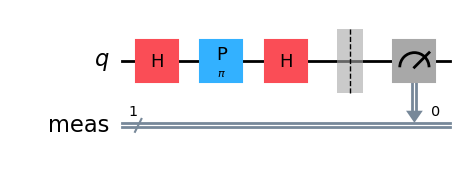

In [40]:
qcoin_pi=QuantumCircuit(1)
qcoin_pi.h(0)
qcoin_pi.p(np.pi,0)
qcoin_pi.h(0)
qcoin_pi.measure_all()

qcoin_pi.draw("mpl")

In [13]:
## Transpile
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qcoin_pi)
 
## Execute
 
# On real hardware:
#sampler = Sampler(mode=backend)
####counts = res[0].data.meas.get_counts()
 
 
# or with Aer simulator with noise model from real backend
job = sampler_sim.run([qc_isa])
counts=job.result()[0].data.meas.get_counts()
 
## Analyze
plot_histogram(counts)

NameError: name 'qcoin_pi' is not defined

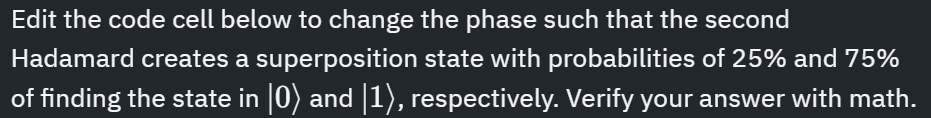

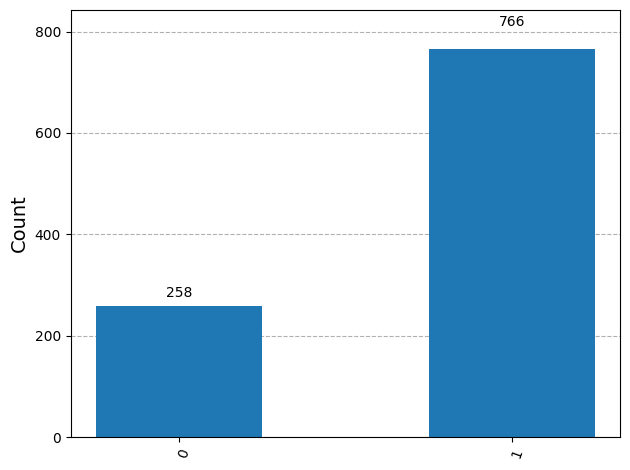

In [ ]:
import numpy as np
qcoin_phase = QuantumCircuit(1)
qcoin_phase.h(0)
# replace "x" below with a phase from 0 to 2*np.pi (this cell won't run if you leave x)
x=2*np.arccos(np.sqrt(0.25)) # 2arccos(sqrt(probability of ket 0))
qcoin_phase.rz(x, 0)
qcoin_phase.h(0)
qcoin_phase.measure_all()
 
 
## Transpile
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qcoin_phase)
 
## Execute
 
# On real hardware:
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs, shots=1000)
#res = job.result()
 
#counts = res[0].data.meas.get_counts()
 
 
# or with Aer simulator with noise model from real backend
job = sampler_sim.run([qc_isa])
counts=job.result()[0].data.meas.get_counts()
 
## Analyze
plot_histogram(counts)